## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
# Combine the data into a single dataset
data=pd.merge(mouse_metadata,study_results, on='Mouse ID')
mouse_metadata.head()
data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [5]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
# Display the data table for preview
data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice.
len(set(data['Mouse ID']))

249

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
data3=data
data1=data
data4=data3[data3.duplicated(subset=['Mouse ID','Timepoint'],keep='first')]
#data1['Check'] = data1['Timepoint']
#data1['Check'].apply(str)
#data1['Check2'] = data1['Mouse ID'] + ' ' + data1['Check']
data4

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Optional: Get all the data for the duplicate mouse ID. 

data3=data1[data1.duplicated(['Mouse ID','Timepoint'],keep='last')]
data3

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1


In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data1=data
data2=data1.drop_duplicates(['Mouse ID','Timepoint'],keep=False)
#data1['Check'] = data1['Timepoint']
#data1['Check'].apply(str)
#data1['Check2'] = data1['Mouse ID'] + ' ' + data1['Check']
data2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [12]:
# Checking the number of mice in the clean DataFrame.
len(set(data2['Mouse ID']))

249

## Summary Statistics

In [13]:
data5=data2
data5.insert(0,'row number',data5.index)
data5

,row number,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,k403,Ramicane,Male,21,16,0,45.000000,0
1,1,k403,Ramicane,Male,21,16,5,38.825898,0
2,2,k403,Ramicane,Male,21,16,10,35.014271,1
3,3,k403,Ramicane,Male,21,16,15,34.223992,1
4,4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...,...
1888,1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumorpvt=pd.pivot_table(data2,columns='Drug Regimen',values='Tumor Volume (mm3)',index='row number')
tumorpvt.columns

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug Regimen')

In [15]:
stat=tumorpvt[['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']].describe()
mean1=tumorpvt[['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']].mean()
median1=tumorpvt[['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']].median()
var1=tumorpvt[['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']].var()
std1=tumorpvt[['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']].std()
sem1=tumorpvt[['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']].sem()
sem2=pd.DataFrame(sem1,columns=['sem'])
mean2=pd.DataFrame(mean1,columns=['mean'])
median2=pd.DataFrame(median1,columns=['median'])
var2=pd.DataFrame(var1,columns=['var'])
std2=pd.DataFrame(std1,columns=['std'])
stat1=pd.merge(sem2,mean2,on='Drug Regimen')
stat2=pd.merge(stat1,median2,on='Drug Regimen')
stat3=pd.merge(stat2,var2,on='Drug Regimen')
stat4=pd.merge(stat3,std2,on='Drug Regimen')
stat4

,sem,mean,median,var,std
Drug Regimen,,,,,
Capomulin,0.329346,40.675741,41.557809,24.947764,4.994774
Ceftamin,0.469821,52.591172,51.776157,39.290177,6.268188
Infubinol,0.492236,52.884795,51.820584,43.128684,6.567243
Ketapril,0.603860,55.235638,53.698743,68.553577,8.279709
Naftisol,0.596466,54.331565,52.509285,66.173479,8.134708
Placebo,0.581331,54.033581,52.288934,61.168083,7.821003
Propriva,0.540135,52.458254,50.854632,44.053659,6.637293
Ramicane,0.320955,40.216745,40.673236,23.486704,4.846308
Stelasyn,0.573111,54.233149,52.431737,59.450562,7.710419


In [16]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
sem3=data2.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
mean3=data2.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median3=data2.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var3=data2.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std3=data2.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem4=pd.DataFrame(sem3)
sem4.columns=['sem']
mean4=pd.DataFrame(mean3)
mean4.columns=['mean']
median4=pd.DataFrame(median3)
median4.columns=['median']
var4=pd.DataFrame(var3)
var4.columns=['var']
std4=pd.DataFrame(std3)
std4.columns=['std']
stat5=pd.merge(sem4,mean4,on='Drug Regimen')
stat6=pd.merge(stat5,median4,on='Drug Regimen')
stat7=pd.merge(stat6,var4,on='Drug Regimen')
stat8=pd.merge(stat7,std4,on='Drug Regimen')
stat8


,sem,mean,median,var,std
Drug Regimen,,,,,
Capomulin,0.329346,40.675741,41.557809,24.947764,4.994774
Ceftamin,0.469821,52.591172,51.776157,39.290177,6.268188
Infubinol,0.492236,52.884795,51.820584,43.128684,6.567243
Ketapril,0.603860,55.235638,53.698743,68.553577,8.279709
Naftisol,0.596466,54.331565,52.509285,66.173479,8.134708
Placebo,0.581331,54.033581,52.288934,61.168083,7.821003
Propriva,0.540135,52.458254,50.854632,44.053659,6.637293
Ramicane,0.320955,40.216745,40.673236,23.486704,4.846308
Stelasyn,0.573111,54.233149,52.431737,59.450562,7.710419


In [17]:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
stat8

,sem,mean,median,var,std
Drug Regimen,,,,,
Capomulin,0.329346,40.675741,41.557809,24.947764,4.994774
Ceftamin,0.469821,52.591172,51.776157,39.290177,6.268188
Infubinol,0.492236,52.884795,51.820584,43.128684,6.567243
Ketapril,0.603860,55.235638,53.698743,68.553577,8.279709
Naftisol,0.596466,54.331565,52.509285,66.173479,8.134708
Placebo,0.581331,54.033581,52.288934,61.168083,7.821003
Propriva,0.540135,52.458254,50.854632,44.053659,6.637293
Ramicane,0.320955,40.216745,40.673236,23.486704,4.846308
Stelasyn,0.573111,54.233149,52.431737,59.450562,7.710419


In [18]:
# Assemble the resulting series into a single summary dataframe.
stat8

,sem,mean,median,var,std
Drug Regimen,,,,,
Capomulin,0.329346,40.675741,41.557809,24.947764,4.994774
Ceftamin,0.469821,52.591172,51.776157,39.290177,6.268188
Infubinol,0.492236,52.884795,51.820584,43.128684,6.567243
Ketapril,0.603860,55.235638,53.698743,68.553577,8.279709
Naftisol,0.596466,54.331565,52.509285,66.173479,8.134708
Placebo,0.581331,54.033581,52.288934,61.168083,7.821003
Propriva,0.540135,52.458254,50.854632,44.053659,6.637293
Ramicane,0.320955,40.216745,40.673236,23.486704,4.846308
Stelasyn,0.573111,54.233149,52.431737,59.450562,7.710419


In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
stat8

,sem,mean,median,var,std
Drug Regimen,,,,,
Capomulin,0.329346,40.675741,41.557809,24.947764,4.994774
Ceftamin,0.469821,52.591172,51.776157,39.290177,6.268188
Infubinol,0.492236,52.884795,51.820584,43.128684,6.567243
Ketapril,0.603860,55.235638,53.698743,68.553577,8.279709
Naftisol,0.596466,54.331565,52.509285,66.173479,8.134708
Placebo,0.581331,54.033581,52.288934,61.168083,7.821003
Propriva,0.540135,52.458254,50.854632,44.053659,6.637293
Ramicane,0.320955,40.216745,40.673236,23.486704,4.846308
Stelasyn,0.573111,54.233149,52.431737,59.450562,7.710419


In [20]:
# Using the aggregation method, produce the same summary statistics in a single line
data2[['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen').agg({"Tumor Volume (mm3)":['mean','median','var','std','sem']})


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.458254  50.854632  44.053659  6.637293  0.540135
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

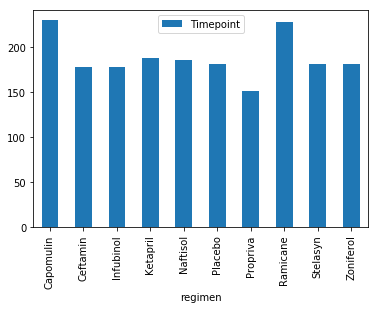

In [21]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
piedata=data2.groupby('Drug Regimen').count()
piedata['regimen']=piedata.index
piedata

pp=piedata.plot.bar(x='regimen',y='Timepoint')
pp

<BarContainer object of 10 artists>

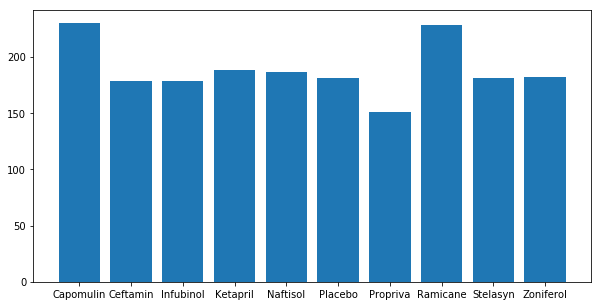

In [22]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x1=piedata['regimen']
y1=piedata['Timepoint']
fig = plt.figure(figsize = (10, 5))
plt.bar(x1,y1)

In [23]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1883 entries, 0 to 1892
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   row number          1883 non-null   int64  
 1   Mouse ID            1883 non-null   object 
 2   Drug Regimen        1883 non-null   object 
 3   Sex                 1883 non-null   object 
 4   Age_months          1883 non-null   int64  
 5   Weight (g)          1883 non-null   int64  
 6   Timepoint           1883 non-null   int64  
 7   Tumor Volume (mm3)  1883 non-null   float64
 8   Metastatic Sites    1883 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 227.1+ KB


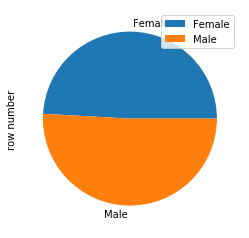

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
piedata1=data2.groupby('Sex').count()
piedata1['Sex']=piedata1.index
piedata1.plot.pie(y='row number')

<function matplotlib.pyplot.show(*args, **kw)>

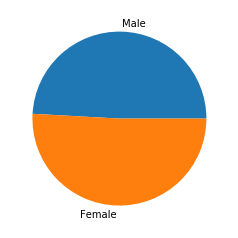

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
piey=piedata1['row number']
mylabels=['Male','Female']
plt.pie(piey,labels=mylabels)
plt.show

## Quartiles, Outliers and Boxplots

In [26]:
data2

,row number,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,k403,Ramicane,Male,21,16,0,45.000000,0
1,1,k403,Ramicane,Male,21,16,5,38.825898,0
2,2,k403,Ramicane,Male,21,16,10,35.014271,1
3,3,k403,Ramicane,Male,21,16,15,34.223992,1
4,4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...,...
1888,1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
qob_data=data2.groupby('Mouse ID').max()
qob_data['Max Time']=qob_data['Timepoint']
qob_data2=pd.merge(qob_data,data2,how='left',left_on=['Mouse ID','Max Time'],right_on=['Mouse ID','Timepoint'])
qob_data2
qob_data3=qob_data2[qob_data2['Drug Regimen_y'].str.contains("Capomulin|Ramicane|Infubinol|Ceftamin")]
qob_data4=qob_data3[['Mouse ID','Drug Regimen_x','Max Time','Tumor Volume (mm3)_y']]
qob_data4

,Mouse ID,Drug Regimen_x,Max Time,Tumor Volume (mm3)_y
0,a203,Infubinol,45,67.973419
1,a251,Infubinol,45,65.525743
3,a275,Ceftamin,45,62.999356
6,a411,Ramicane,45,38.407618
7,a444,Ramicane,45,43.047543
...,...,...,...,...
239,y769,Ceftamin,45,68.594745
240,y793,Capomulin,45,31.896238
241,y865,Ceftamin,45,64.729837
245,z578,Ramicane,45,30.638696


In [28]:
data2 = data2[['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months',
       'Weight (g)', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites']]

In [29]:
qob_data=data2.groupby('Mouse ID')['Timepoint'].max().to_frame()

qob_data.reset_index(inplace=True)
qob_data

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
244,z435,10
245,z578,45
246,z581,45
247,z795,45


In [30]:
qob_data2=pd.merge(qob_data,data2,how='left',left_on=['Mouse ID','Timepoint'],right_on=['Mouse ID','Timepoint'])
qob_data2
# qob_data3=qob_data2[qob_data2['Drug Regimen_y'].str.contains("Capomulin|Ramicane|Infubinol|Ceftamin")]
# qob_data4=qob_data3[['Mouse ID','Drug Regimen_x','Max Time','Tumor Volume (mm3)_y']]
# qob_data4

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [31]:
qob_data3.columns

Index(['Mouse ID', 'row number_x', 'Drug Regimen_x', 'Sex_x', 'Age_months_x',
       'Weight (g)_x', 'Timepoint_x', 'Tumor Volume (mm3)_x',
       'Metastatic Sites_x', 'Max Time', 'row number_y', 'Drug Regimen_y',
       'Sex_y', 'Age_months_y', 'Weight (g)_y', 'Timepoint_y',
       'Tumor Volume (mm3)_y', 'Metastatic Sites_y'],
      dtype='object')

In [35]:
# Put treatments into a list for for loop (and later for plot labels)
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments= list(set(data2['Drug Regimen']))
treatments=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

45.0 56.34632118 11.346321179999997 78.56701362 22.05012627


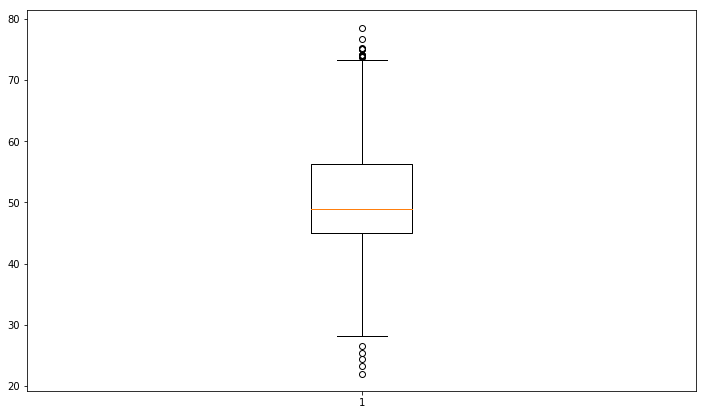

In [36]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol={}


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
q1=data2['Tumor Volume (mm3)'].quantile(0.25)
q3=data2['Tumor Volume (mm3)'].quantile(0.75)  
iqr=q3-q1
low_limit=q1-1.5*iqr
high_limit=q3+1.5*iqr
max1=data2['Tumor Volume (mm3)'].max() 
min1=data2['Tumor Volume (mm3)'].min() 

####Output looks like there will be outliers
print(q1,q3,iqr,max1,min1)

# Locate the rows which contain mice on each drug and get the tumor volumes



###def subset_by_iqr(df, column, whisker_width=1.5):
    #filter = (df[column] < q1 - whisker_width*iqr) & (df[column] > q3 + whisker_width*iqr)
    #return df.loc[filter]       
###df_filtered = subset_by_iqr(qob_data4, 'Tumor Volume (mm3)_y', whisker_width=1.5)
###df_filtered


    # add subset 
    #outlier=[]
    
    
    
    # Determine outliers using upper and lower bounds
#outlier
    
plt.figure(figsize=(12, 7))
plt.boxplot(data2['Tumor Volume (mm3)'])
plt.show()
#####There doesnt appear to be any outliers per the calculated method or the charting method.  I have racked my head on this trying too long on why several methods produced blank dataframes.  I am moving on for now.    

In [37]:
tumor_list = []
for x in treatments:
#     print(x)
    drug_data = qob_data2.loc[qob_data2["Drug Regimen"]==x, 'Tumor Volume (mm3)']
    q1=drug_data.quantile(0.25)
    q3=drug_data.quantile(0.75)  
    iqr=q3-q1
    low_limit=q1-1.5*iqr
    high_limit=q3+1.5*iqr
    max1=drug_data.max() 
    min1=drug_data.min() 
    tumor_list.append(drug_data)
    ####Output looks like there will be outliers
#     print(x, q1,q3,iqr,max1,min1)
    outliers = drug_data[(drug_data<low_limit) | (drug_data>high_limit)]
    if len(outliers)>0:
        print(x, str(outliers.values))

Infubinol [36.3213458]


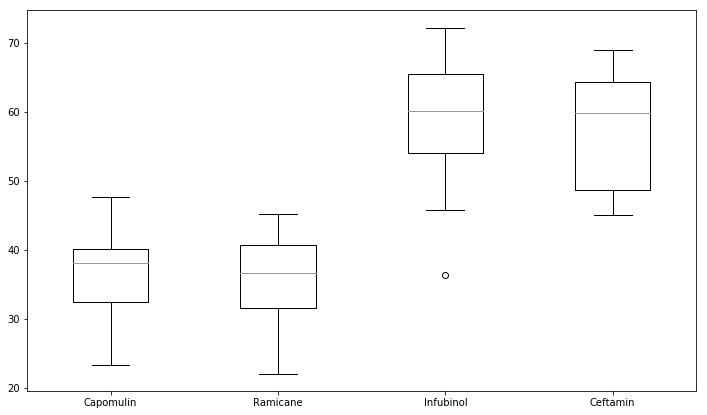

In [38]:
plt.figure(figsize=(12, 7))
plt.boxplot(tumor_list, labels=treatments)
plt.show()

In [39]:
treatments

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [40]:
qob_data2

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


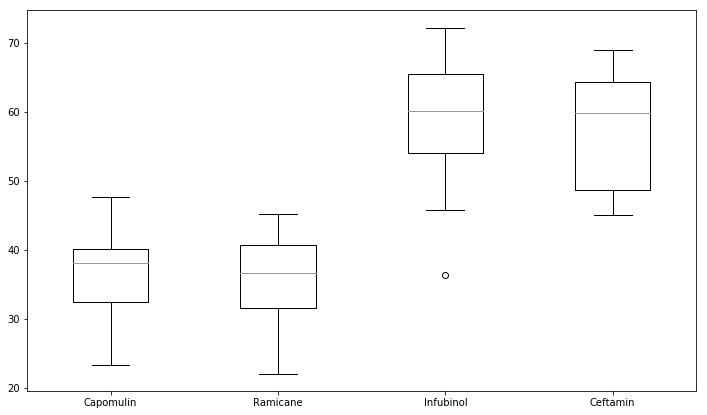

In [41]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.figure(figsize=(12, 7))
plt.boxplot(tumor_list, labels=treatments)
plt.show()

## Line and Scatter Plots

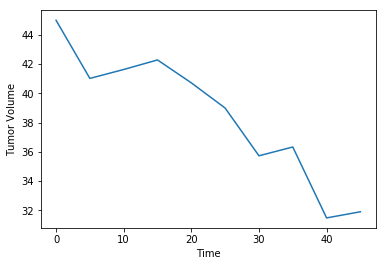

In [49]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin=data2.loc[data2['Drug Regimen']=='Capomulin']
capmouse=capomulin.loc[data2['Mouse ID']=='y793']
plt.plot(capmouse['Timepoint'],capmouse['Tumor Volume (mm3)'])
plt.xlabel('Time')
plt.ylabel('Tumor Volume')
plt.show()

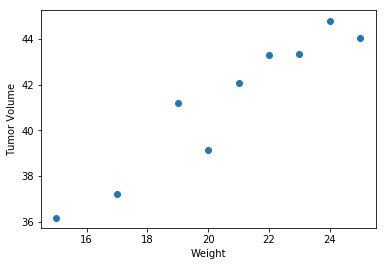

In [72]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
import numpy as np
scatter_data=pd.pivot_table(capomulin,index='Weight (g)',values='Tumor Volume (mm3)',aggfunc=np.mean)
scatter_data['Weight']=scatter_data.index
scatter_data
x_scatter=scatter_data['Weight']
y_scatter=scatter_data['Tumor Volume (mm3)']
plt.scatter(x_scatter,y_scatter)
plt.xlabel('Weight')
plt.ylabel('Tumor Volume')
plt.show()

## Correlation and Regression

In [80]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=st.pearsonr(x_scatter,y_scatter)
print('The correlation is')
print(corr[0])

The correlation is
0.950524396185527


<function matplotlib.pyplot.show(*args, **kw)>

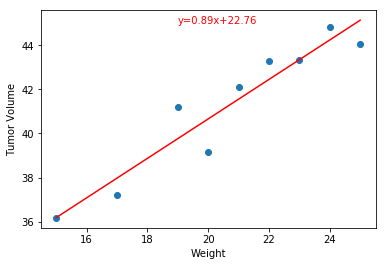

In [101]:
(slope,intercept,rvalue,pvalue,stderr)=st.linregress(x_scatter,y_scatter)
line_fit=x_scatter*slope+intercept
plt.scatter(x_scatter,y_scatter)
plt.xlabel('Weight')
plt.ylabel('Tumor Volume')
plt.plot(x_scatter,line_fit,color='red')
formula="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
plt.annotate(formula,(19,45),color='red')
plt.show